# Control Examples

In [3]:
try:
    from control.matlab import *
except:
    !python3 -m pip install control
    from control.matlab import *
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 5.0]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.grid'] = True

SMALL_SIZE = 14
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def nicegrid(ax=plt):
    ax.grid(True, which='major', color='#666666', linestyle=':')
    ax.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
    ax.minorticks_on()
    
%matplotlib inline

In [4]:
# define P as a transfer function
P = tf([0, 4],[1,2,3])
P

TransferFunction(array([4]), array([1, 2, 3]))

In [5]:
# Second approach
s = tf('s')
P = 4/(s**2 + 2*s + 3)
P

TransferFunction(array([4]), array([1, 2, 3]))

In [6]:
# third approach
A = [[0, 1],[-3, -2]]
B = [[0],[1]]
C = [[4, 0],[0, 1]]
D = [[0],[0]]
Pss = ss(A,B,C,D)
Pss

StateSpace(array([[ 0.,  1.],
       [-3., -2.]]), array([[0.],
       [1.]]), array([[4., 0.],
       [0., 1.]]), array([[0.],
       [0.]]))

In [7]:
P = ss2tf(A,B,C[0][:],D[0][:]) # to be consistent with the above
for ii in range(len(P.num[0][0][:])):
    if P.num[0][0][ii] < 1e-12:
        P.num[0][0][ii] = 0
    else:
        P.num[0][0][ii] = P.num[0][0][ii]
P

TransferFunction(array([0., 4.]), array([1., 2., 3.]))

## Try some plotting 

In [8]:
t = np.arange(0,10,0.01)
y,t = impulse(Pss,t)

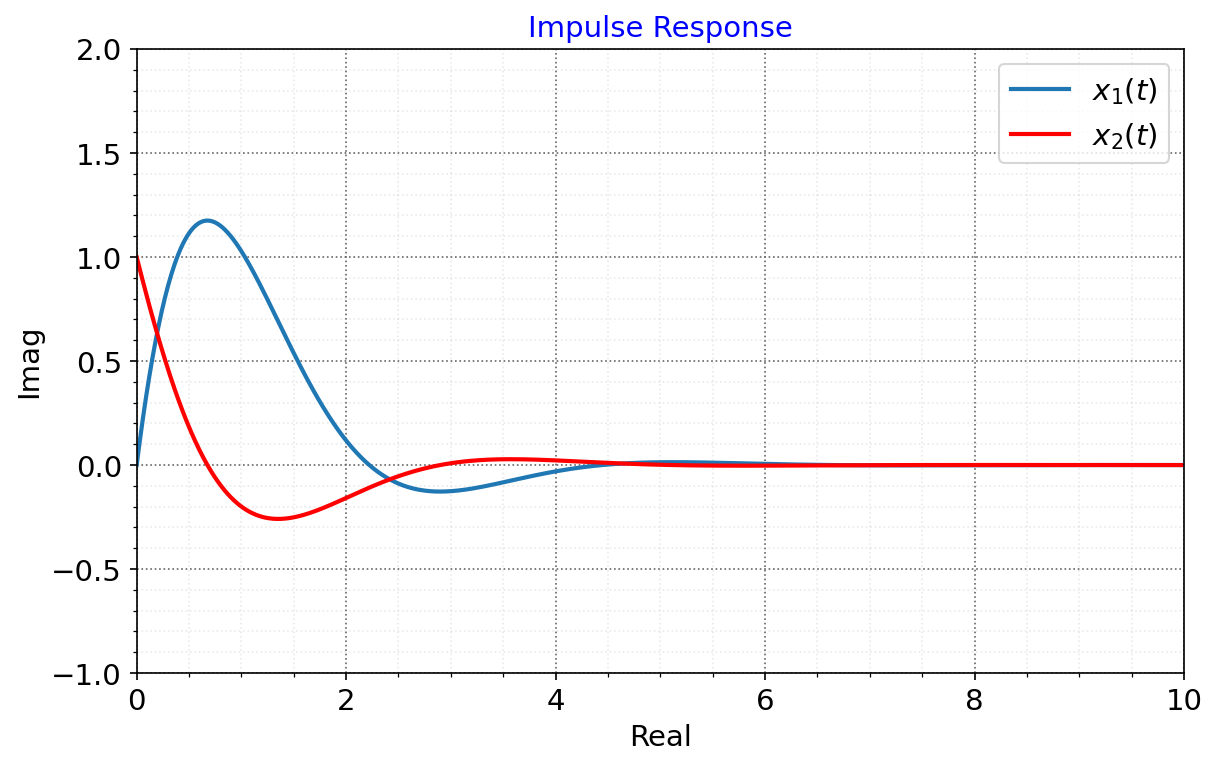

In [9]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-1,2)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Impulse Response')
plt.show()

In [10]:
t = np.arange(0,10,0.01)
y,t = step(Pss,t)

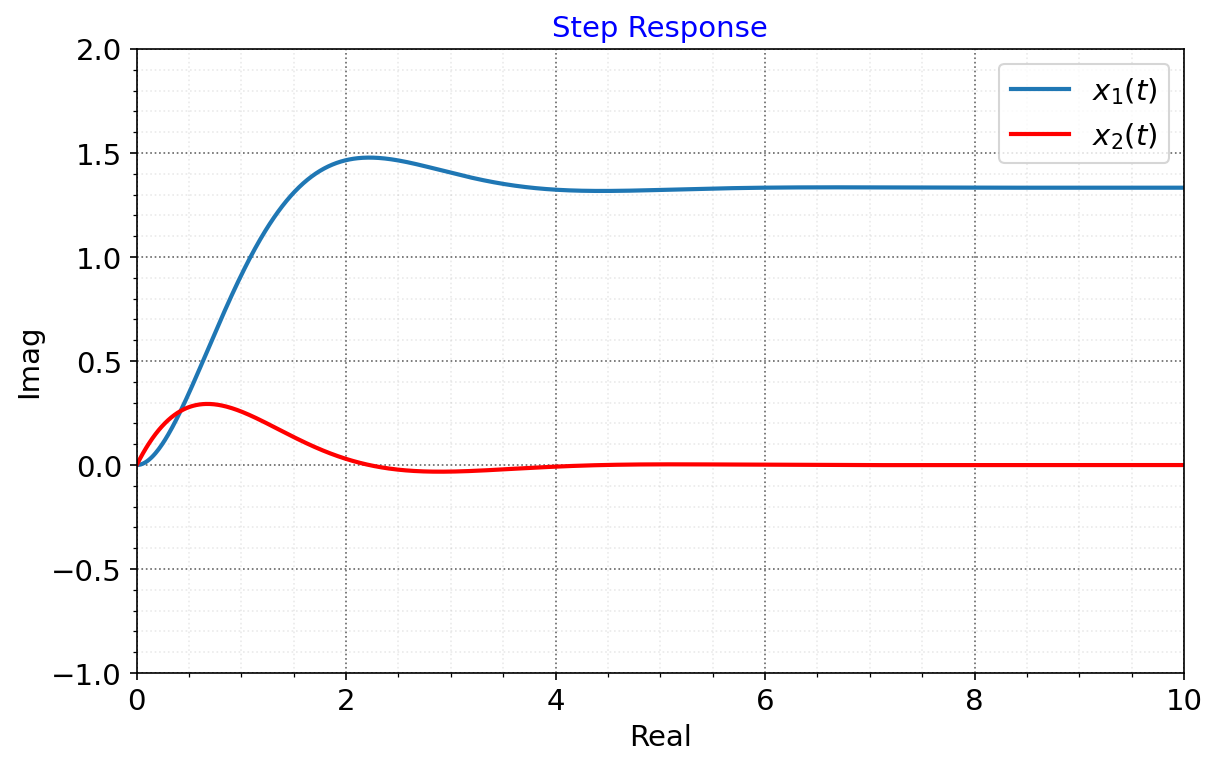

In [11]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-1,2)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Step Response')
plt.show()

In [12]:
X0 = [0, -1]
y,t = initial(Pss,t,X0)

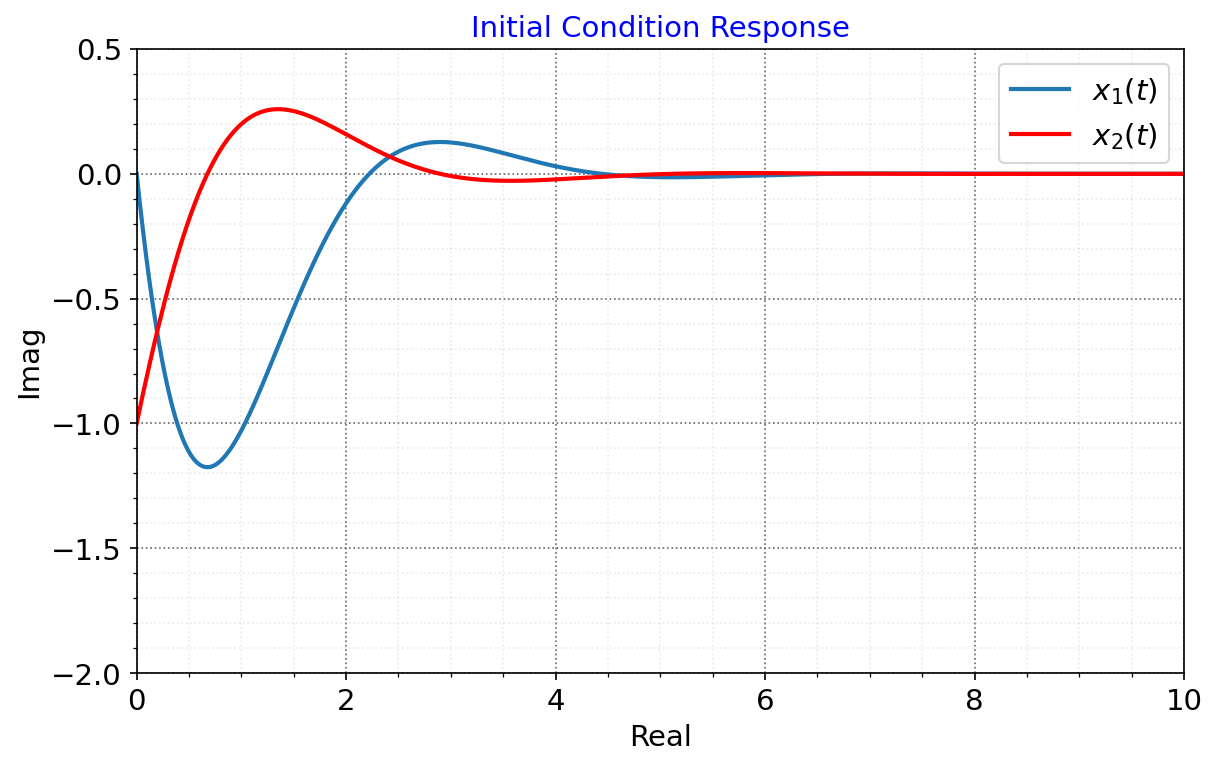

In [13]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-2,0.5)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Initial Condition Response')
plt.show()

In [14]:
U = np.sin(5*2*np.pi*t)
y,t,xout = lsim(Pss,U,t,X0)

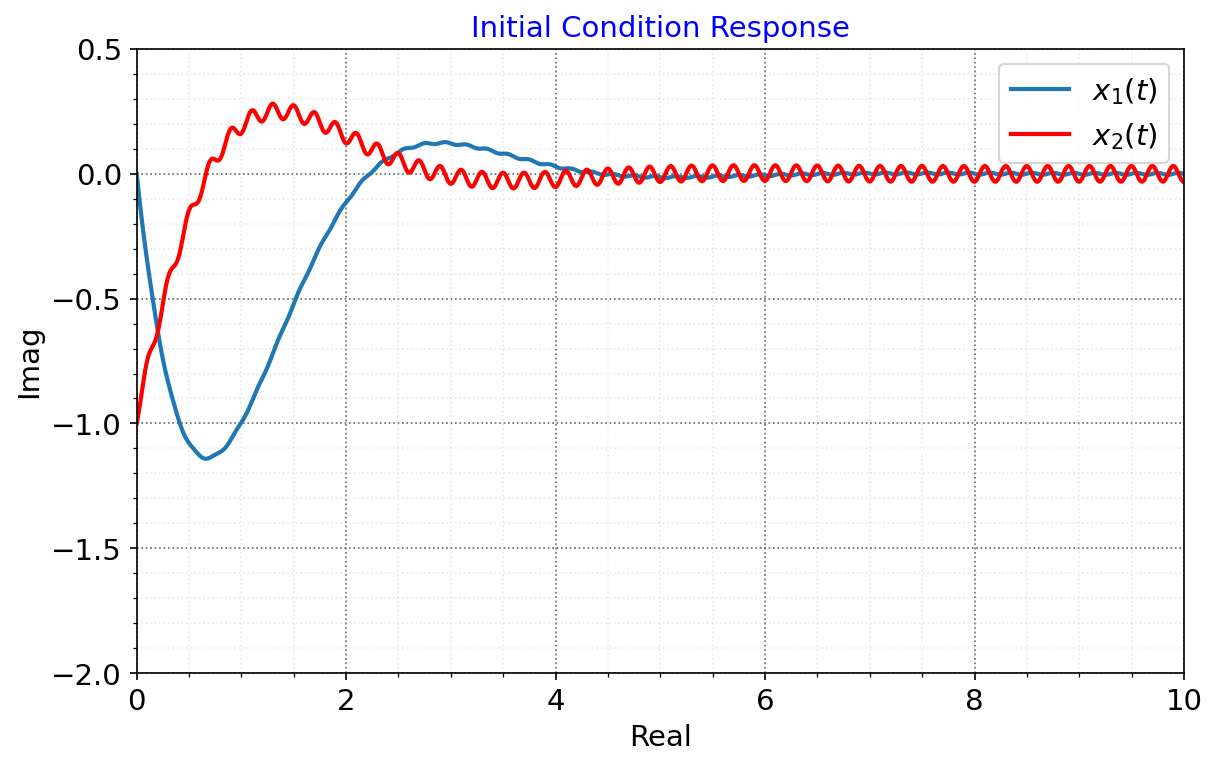

In [15]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-2,0.5)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Initial Condition Response')
plt.show()

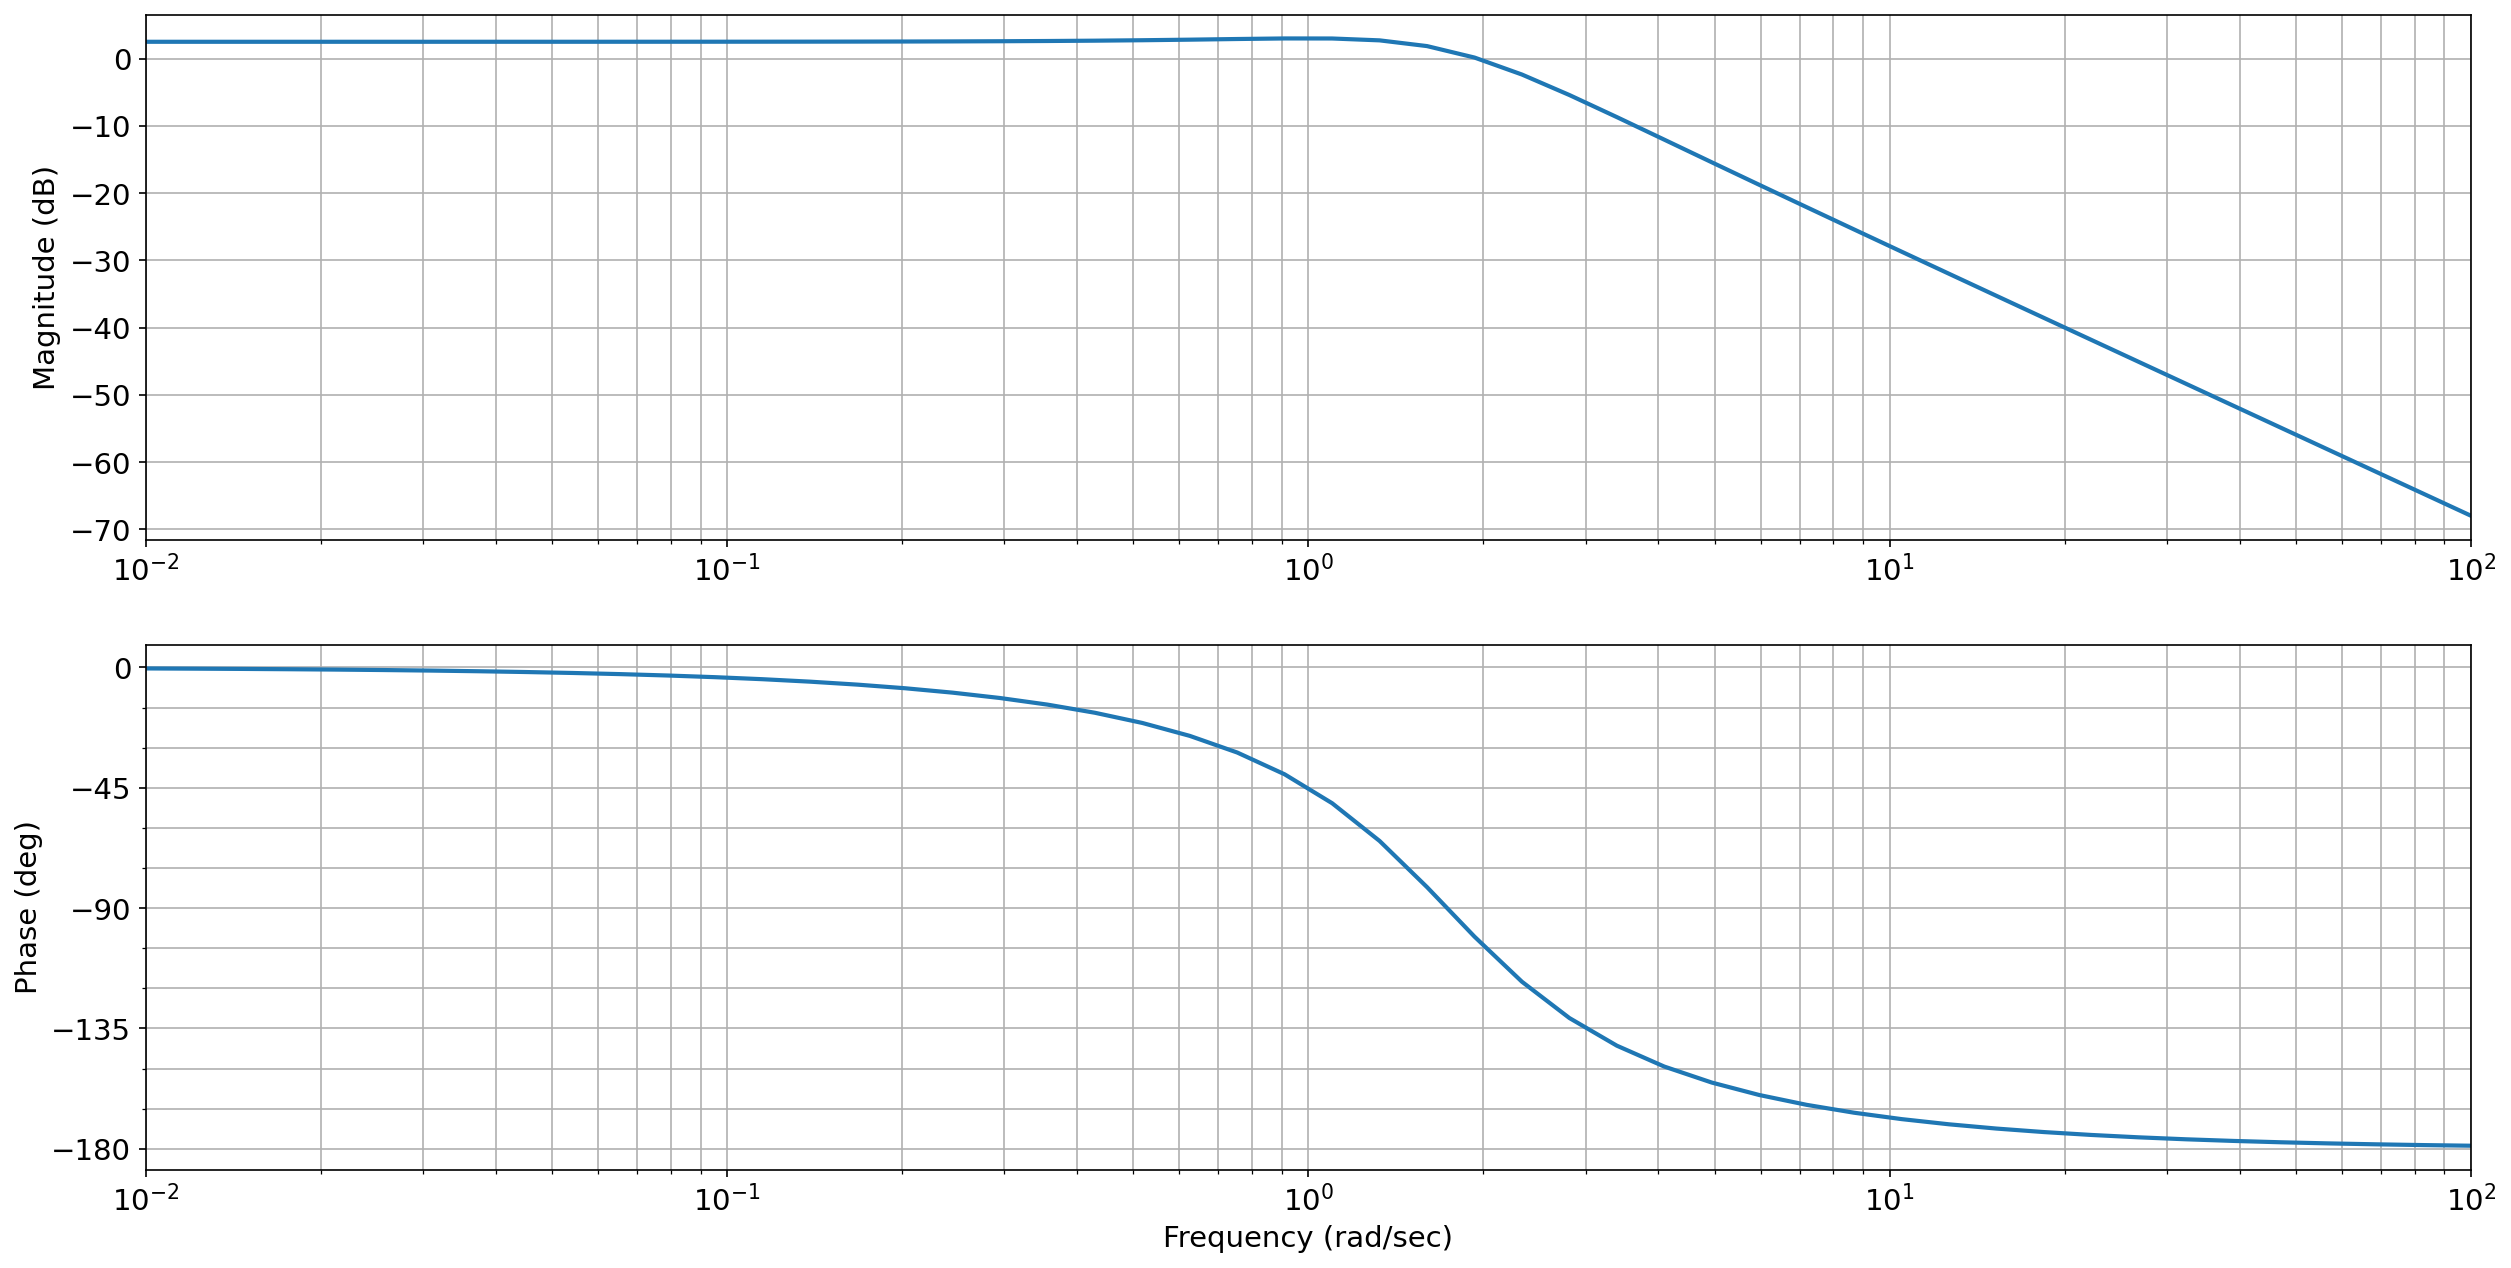

In [16]:
s = tf('s')
P = 4/(s**2 + 2*s + 3)
gain, phase, w = bode(P, logspace(-2,2))
plt.xlim(.01,100)

In [17]:
P.pole()

array([-1.+1.41421356j, -1.-1.41421356j])

In [18]:
P.zero()

array([], dtype=float64)

In [19]:
GM, PM, wpc, wgc = margin(P)
print(f'GM = {20*np.log10(GM):2f}')
print(f'PM = {PM:2f}')
print(f'wpc = {wpc:2f}')
print(f'wgc = {wgc:2f}')

GM = inf
PM = 78.047144
wpc = nan
wgc = 1.956637


## Example

In [311]:
# define P as a transfer function
wn = np.sqrt(3)
zeta = 2/2/wn
if zeta < 1:
    wd = wn*np.sqrt(1-zeta**2)
else:
    wd = 1
# define P as a transfer function
P = tf([0, wn**2],[1,2*zeta*wn,wn**2])
P

TransferFunction(array([3.]), array([1., 2., 3.]))

In [312]:
Tf = 5
t = np.arange(0,Tf,0.01)
y,t = step(P,t)

zc = 20
kc = 1

Gc = kc*tf([1, zc],[1])
Pcl = Gc*P/(1+Gc*P)
ycl,t = step(Pcl,t)
yss = ycl[-1]

In [313]:
try:
    from tbcontrol.symbolic import routh
except:
    !pip install tbcontrol
    from tbcontrol.symbolic import routh

import numpy as np
import sympy 
from sympy import fraction, roots, re, N, im, sqrt, exp, pi
sympy.init_printing()
print('sympy version '+sympy.__version__)

s = sympy.Symbol('s')
K_c = sympy.Symbol('K_c')

Ns = P.num[0][0][0]
Ds = P.den[0][0][0]*s**2 + P.den[0][0][1]*s + P.den[0][0][2] 
Ds = sympy.Poly(Ds, s)
Ds

sympy version 1.11.1


In [314]:
Gcs = K_c*(s+zc)
Gcs = sympy.Poly(Gcs, s)
Gcs

In [315]:
phi = Ns*Gcs+Ds

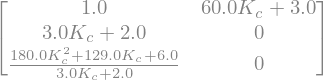

In [316]:
RA = routh(phi)
RA

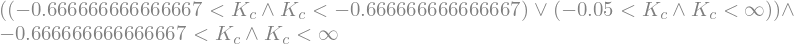

In [317]:
rr = sympy.solve([e > 0 for e in RA[:, 0]], K_c)
rr

In [318]:
roots(phi.subs(K_c,kc))

In [319]:
rrr = np.array(list(roots(phi.subs(K_c,kc))))[0] # pick one of the roots
print(N(rrr))
wd = abs(im(rrr))
zeta = 1/sqrt(1+(im(rrr)/re(rrr))**2)
wn = -re(rrr)/zeta
print(f'\nomega_d = {wd:.2f}r/s')
print(f'zeta = {zeta:.2f}')
print(f'omega_n = {wn:.2f}r/s\n')

tp = abs(pi/wd)
Mp = exp(-pi*zeta/sqrt(1-zeta**2))
ts = abs(4.6/zeta/wn)
tr = 1.8/wn
print(f'predicted peak time is {tp:.2f}s')
print(f'predicted peak height is {1+Mp:.2f}')
print(f'predicted rise time is {tr:.2f}s')
print(f'predicted settling time is {ts:.2f}s')

-2.5 - 7.53325958665968*I

omega_d = 7.53r/s
zeta = 0.31
omega_n = 7.94r/s

predicted peak time is 0.42s
predicted peak height is 1.35
predicted rise time is 0.23s
predicted settling time is 1.84s


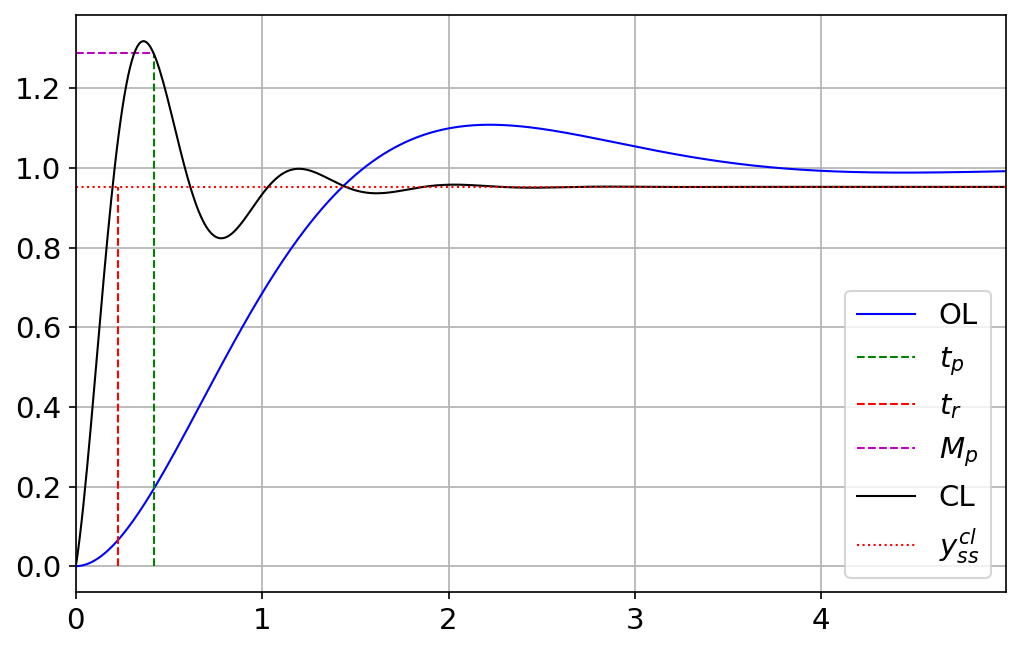

In [323]:
fig, ax1 = plt.subplots(1,figsize=(8, 5),dpi=150)
ax1.plot(t, y, 'b-', label='OL', linewidth=1)
ax1.plot([tp,tp], [0, yss*(1+Mp)], 'g--', label='$t_p$', linewidth=1)
ax1.plot([tr,tr], [0, yss], 'r--', label='$t_r$', linewidth=1)
ax1.plot([0,tp], [yss*(1+Mp), yss*(1+Mp)], 'm--', label='$M_p$', linewidth=1)
ax1.plot(t, ycl, 'k-', label='CL', linewidth=1)
ax1.plot([0,max(t)], [yss, yss], 'r:', label='$y^{cl}_{ss}$', linewidth=1)
ax1.legend(loc='best')
plt.show()

In [308]:
roots(phi.subs(K_c,kc))